# Project: Measure Bias Across All Genres

# 프로젝트 : 모든 장르 간 편향성 측정해 보기

In [54]:
import konlpy
import gensim
import sklearn
import seaborn

print(konlpy.__version__)
print(gensim.__version__)
print(sklearn.__version__)
print(seaborn.__version__)

0.5.2
4.1.2
1.0
0.11.2


## STEP 1. Extract words where the part of speech is a noun using a morphological analyzer

## STEP 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [55]:
#$ cd ~/aiffel/weat && unzip synopsis.zip

In [56]:
import os

with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [57]:
#$ pip install konlpy

In [58]:
# 약 15분정도 걸립니다.
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)

토큰화 된 명사들이 71156개인 걸 확인할 수 있다.
There are 71156 nouns in 'tokenized'.

In [59]:
print(len(tokenized))

71156


## STEP 2. Create an embedding model using the extracted results

## STEP 2. 추출된 결과로 embedding model 만들기

In [60]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
model.wv.most_similar(positive=['영화'])

# Gensim 3.X 에서는 아래와 같이 생성합니다. 
# model = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)  
# model.most_similar(positive=['영화'])

[('작품', 0.8862999677658081),
 ('다큐멘터리', 0.8631620407104492),
 ('드라마', 0.8225721120834351),
 ('영화로', 0.7922215461730957),
 ('주제', 0.7774326205253601),
 ('코미디', 0.7727257609367371),
 ('시대극', 0.7700636982917786),
 ('형식', 0.7657809853553772),
 ('감동', 0.7644533514976501),
 ('소재', 0.7615347504615784)]

In [61]:
model.wv.most_similar(positive=['사랑'])

[('행복', 0.7145829796791077),
 ('첫사랑', 0.7097080945968628),
 ('만남', 0.6983372569084167),
 ('이별', 0.6962155103683472),
 ('만인', 0.6948897242546082),
 ('애정', 0.6923516392707825),
 ('진심', 0.6849043369293213),
 ('정해준', 0.6809933185577393),
 ('연애', 0.6794639825820923),
 ('가슴', 0.6784453988075256)]

In [62]:
model.wv.most_similar(positive=['연극'])

[('시나리오', 0.8991982936859131),
 ('배우', 0.8898254632949829),
 ('대본', 0.8818408846855164),
 ('영화감독', 0.8774452805519104),
 ('연기', 0.8614775538444519),
 ('각색', 0.8574336767196655),
 ('팬', 0.854668140411377),
 ('무용', 0.8515351414680481),
 ('오페라', 0.8503368496894836),
 ('공연', 0.8493944406509399)]

In [63]:
model.wv.most_similar(positive=['슬픔'])

[('아픔', 0.939929723739624),
 ('상처', 0.9208657741546631),
 ('고통', 0.9180230498313904),
 ('회한', 0.9094493985176086),
 ('상실', 0.9080679416656494),
 ('절망', 0.907957136631012),
 ('트라우마', 0.8938409090042114),
 ('기도', 0.8887752890586853),
 ('괴로움', 0.8863673806190491),
 ('좌절', 0.8830568790435791)]

## STEP 3. Create target and attribute word sets. (TF-IDF)

## STEP 3. target, attribute 단어 셋 만들기

Read the two files 'synopsis_art.txt' and 'synopsis_gen.txt', and extract only the nouns. Assign these to variables named art and gen.

'synopsis_art.txt', 'synopsis_gen.txt' 두 파일을 읽고, 명사에 대해서만 추출하여 art, gen 변수에 할당한다.

In [64]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, 'Reading the file')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)


In [65]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt Reading the file
synopsis_gen.txt Reading the file


WEAT 계산을 위해서는 총 4개의 단어 셋 X, Y, A, B가 필요하다. TF-IDF를 사용해 코퍼스에서 자주 나타나는(TF가 높은) 단어이지만, 다른 코퍼스에까지 두루 걸쳐 나오지는 않는(IDF가 높은) 단어를 선정한다.

For WEAT calculation, total of four word sets X, Y, A, and B are required. Selet words that frequently appear in the corpus(high TF), but not widely appear across other curpora(high IDF). However this way is not always recommanded.

여기에서는 art와 gen 두개의 문서가 있으므로 2, 그리고 TF-IDF 변환 후 art와 gen에서 추출된 고유 단어(토큰의 수) 41082를 확인할 수 있다.

With two documents 'art' and 'gen', we have 41,082 unique tokens after TF-IDF transformation.

In [66]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [67]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

23976
영화


In [68]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')


예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

두 개념을 대표하는 단어를 TF-IDF가 높은 순으로 추출하는데 양쪽에 중복된 단어가 너무 많은 것을 볼 수 있다. 두 개념축이 대조되도록 대표하는 단어 셋을 만들기 위해 단어가 서로 중복되지 않게 단어셋을 추출해야 한다. 우선 상위 100개의 단어들 중 중복되는 단어를 제외하고 상위 n(=15)개의 단어를 추출한다.

When extracting words that represent the two concepts based on their high TF-IDF values, I noticed a significant number of overlapping words between both sets. To create word sets that contrast the two concepts, it's crucial to extract sets without duplicated words. Initially, from the top 100 words, excluding duplicates, I will extract the top n(=15) words.

In [69]:
n = 50
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
# Extract 15 words that are present in w1 but not in w2, representing artistic films effectively.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
# Extract 15 words that are present in w2 but not in w1, representing mainstream films effectively.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [70]:
print(target_art)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린', '연인']


In [71]:
print(target_gen)

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체', '한국']


장르별 대표 단어를 추출해보자. 드라마 장르와 액션 장르를 다루어 보려고 했으나 단 2개의 장르만 고려하기보다는 여러 장르의 코퍼스를 두루 고려하는 것이 특정 장르를 대표하는 단어를 선택하는 데 더 유리할 것이다. 그래서 주요 장르 6개만 고려해본다.

Considering corpora from various genres rather than just two could be more advantageous in selecting representative words for specific genres. Therefore, only the six major genres will be considered.

In [72]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [73]:
# 약 10분정도 걸립니다.
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt Reading the file
synopsis_family.txt Reading the file
synopsis_show.txt Reading the file
synopsis_horror.txt Reading the file
synopsis_etc.txt Reading the file
synopsis_documentary.txt Reading the file
synopsis_drama.txt Reading the file
synopsis_romance.txt Reading the file
synopsis_musical.txt Reading the file
synopsis_mystery.txt Reading the file
synopsis_crime.txt Reading the file
synopsis_historical.txt Reading the file
synopsis_western.txt Reading the file
synopsis_adult.txt Reading the file
synopsis_thriller.txt Reading the file
synopsis_animation.txt Reading the file
synopsis_action.txt Reading the file
synopsis_adventure.txt Reading the file
synopsis_war.txt Reading the file
synopsis_comedy.txt Reading the file
synopsis_fantasy.txt Reading the file


In [74]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


1. Sparse Matrix 변환: 주어진 X 행렬에서 각 행에 대해 COO (Coordinate) 형식의 표현으로 변환하여 리스트 m에 저장한다. COO 형식은 희소 행렬에서 비어 있지 않은 요소의 (행, 열, 값) 쌍을 나타낸다.
2. 중요 단어 추출: m에서 각 COO 형식 행렬을 반복하여 단어의 인덱스와 TF-IDF 값의 리스트를 생성되어 w에 저장된다. 각 문서의 단어는 TF-IDF 값에 따라 내림차순으로 정렬된다.
3. 장르 별 핵심 단어 출력: 각 문서(장르)에 대해 상위 15개의 중요한 단어를 출력되며 해당 단어가 Word2Vec 모델에 존재하는지 확인한 후, 존재하는 단어만 attributes 리스트에 저장된다.

1. Sparse Matrix Conversion: For the given matrix X, convert each row into a COO (Coordinate) format representation, storing it in the list m. The COO format represents non-zero elements in sparse matrices as pairs of (row, column, value).
2. Extraction of Important Words: Iterate over each COO-format matrix in m to create a list in w containing indices and TF-IDF values of words. Words within each document are sorted in descending order based on their TF-IDF values.
3. Displaying Key Words by Genre: For each document (genre), output the top 15 important words. After checking if each word exists in the Word2Vec model, only those that do are stored in the attributes list.

In [75]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 마을, 국제, 낙타, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내, 
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 페뷔스, 
미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 남자, 
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해, 
사극: 조선, 위해, 시작, 신기전, 사랑, 자신, 아가멤논, 황제, 그녀, 루안, 최고, 운명, 사람, 하선, 전쟁, 
서부극(웨스턴): 서부, 보안관, 위해, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 자신, 개릿, 아이, 시작, 무법자, 프린트, 마적, 
성인물(에로): 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀, 마음, 사랑, 
스릴러: 자신, 그녀, 사건, 

각 장르를 대표하는 단어들을 추출해보았는데 중복된 단어들이 종종 있지만 art, gen 두 개의 단어 셋을 추출했을 때 보단 그 수가 적다. 그러므로 중복을 체크해서 삭제하기보다 그대로 사용한다.

Extracted representative words for each genre, and while there are occasional overlaps, it's fewer compared to when deriving the word sets for 'art' and 'gen'. Thus, instead of checking and removing duplicates, they are utilised as they stand.

## STEP 4. Calculate and visualise the WEAT score.
## STEP 4. WEAT score 계산과 시각화

In [76]:
def cos_sim(i, j):
    return np.dot(i, j.T)/(np.linalg.norm(i)*np.linalg.norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B

In [77]:
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

traget_X는 art, target_Y는 gen, attribute_A는 '드라마', attribute_B는 '액션' 과 같이 정해준다. 
target_X 는 art, target_Y 는 gen으로 고정하고 attribute_A, attribute_B를 바꿔가면서 구한 결과를 21x21 매트릭스 형태로 표현해서 matrix 라는 변수에 담는다.

Set target_X as 'art' and target_Y as 'gen', while attribute_A is designated as 'drama' and attribute_B as 'action'. Keeping target_X as 'art' and target_Y as 'gen' constant, vary attribute_A and attribute_B iteratively to obtain results. Represent the outcomes in a 21x21 matrix format and store it in a variable named matrix.

In [78]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [79]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 -0.5958322
SF 공연 -0.50641876
SF 공포(호러) -0.7899371
SF 기타 0.2891464
SF 다큐멘터리 0.5997088
SF 드라마 -0.5113778
SF 멜로로맨스 -0.8930345
SF 뮤지컬 0.25635916
SF 미스터리 -0.8039437
SF 범죄 -0.37782744
SF 사극 -0.9244592
SF 서부극(웨스턴) -0.44589105
SF 성인물(에로) -0.705054
SF 스릴러 -0.6490965
SF 애니메이션 0.32458538
SF 액션 -0.5930656
SF 어드벤처 -0.8023568
SF 전쟁 0.2028477
SF 코미디 -0.5914726
SF 판타지 -0.27164823
가족 공연 0.13225116
가족 공포(호러) -0.1992406
가족 기타 0.7961964
가족 다큐멘터리 0.9007755
가족 드라마 0.15532434
가족 멜로로맨스 -0.74223053
가족 뮤지컬 0.7196688
가족 미스터리 -0.3822294
가족 범죄 0.15803987
가족 사극 -0.090460606
가족 서부극(웨스턴) 0.58549327
가족 성인물(에로) -0.45671284
가족 스릴러 -0.21198177
가족 애니메이션 0.9267078
가족 액션 0.07819225
가족 어드벤처 0.09356583
가족 전쟁 0.71720463
가족 코미디 0.14193267
가족 판타지 0.49048328
공연 공포(호러) -0.24057938
공연 기타 1.0248489
공연 다큐멘터리 1.0173547
공연 드라마 0.006448662
공연 멜로로맨스 -0.78716415
공연 뮤지컬 0.94410473
공연 미스터리 -0.3855104
공연 범죄 0.06630234
공연 사극 -0.30305785
공연 서부극(웨스턴) 0.23919006
공연 성인물(에로) -0.58841985
공연 스릴러 -0.24516845
공연 애니메이션 1.0220753
공연 액션 -0.01772525

WEAT score가 0.8 이상, -0.8 이하의 경우만 해석해 보면 아래와 같다.

- 예술영화와 일반영화, 그리고 드라마와 멜로로맨스의 WEAT score의 의미를 해석해보면 예술영화는 멜로로맨스, 일반영화는 드라마와 가깝다고 볼 수 있다. 부호가 마이너스이므로 사람의 편향과 반대라는 것을 알 수 있다.
- 예술영화와 일반영화, 그리고 멜로로맨스와 코미디의 WEAT score의 의미를 해석해보면 예술 영화는 멜로로맨스와 가깝고, 코디미는 일반 영화와 가깝다고 볼 수 있다.
- 예술영화와 일반영화, 그리고 멜로로맨스와 전쟁의 WEAT score의 의미를 해석해보면 예술 영화는 멜로로맨스와 가깝고, 전쟁은 일반 영화와 가깝다고 볼 수 있다.


When interpreting WEAT scores that are above 0.8 or below -0.8, the implications are as follows:

- Comparing the WEAT scores between art films and general films, as well as between drama and romance genres, one can infer that art films are closer to romance, while general films are closer to drama. The negative sign indicates opposition to human biases.
- Analyzing the WEAT scores between art films and general films, as well as between romance and comedy genres, it can be interpreted that art films are closer to romance, while comedy is closer to general films.
- Examining the WEAT scores between art films and general films, as well as between romance and war genres, it suggests that art films align more closely with romance, whereas war aligns more with general films.

<AxesSubplot:>

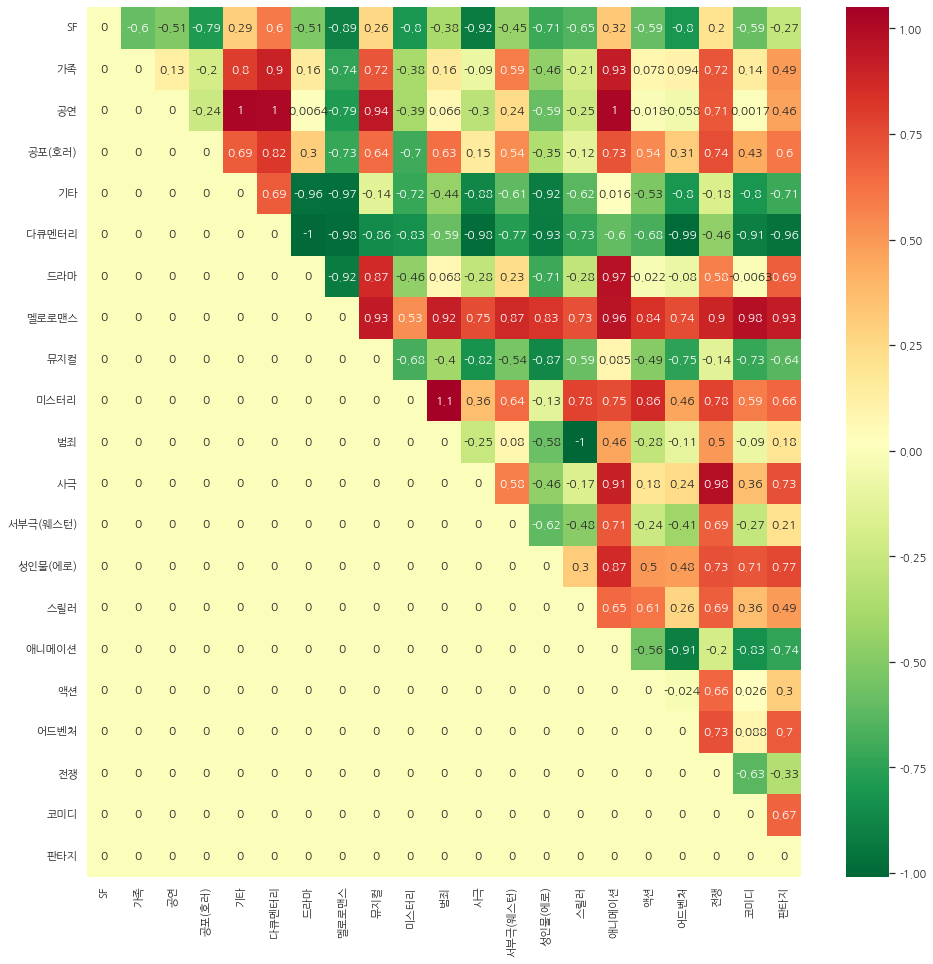

In [82]:
import numpy as np; 
import seaborn as sns;
import matplotlib.pyplot as plt

np.random.seed(0)

# 한글 지원 폰트 Korean-supported font
sns.set(font='NanumGothic')

# 마이너스 부호 
plt.figure(figsize=(16,16))
plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

## 회고

word embedding model을 만들어 특정 분야에 대해 편향되어 있는지를 확인해 볼 수 있었던 게 정말 흥미로웠고 TF-IDF와 Word2Vec에 익숙해지는 데에 좋은 학습이였다. 하이퍼라미터 값을 바꿔보고 다른 방식으로 전처리를 해서 학습시켜보고 싶었지만 시간이 부족해서 하지 못한 게 너무 아쉬웠다.